#FluorescenceQuantification

**Module Import**
- PIL (Python Image Library)
- Numpy
- Matplotlib

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Load Image Files**

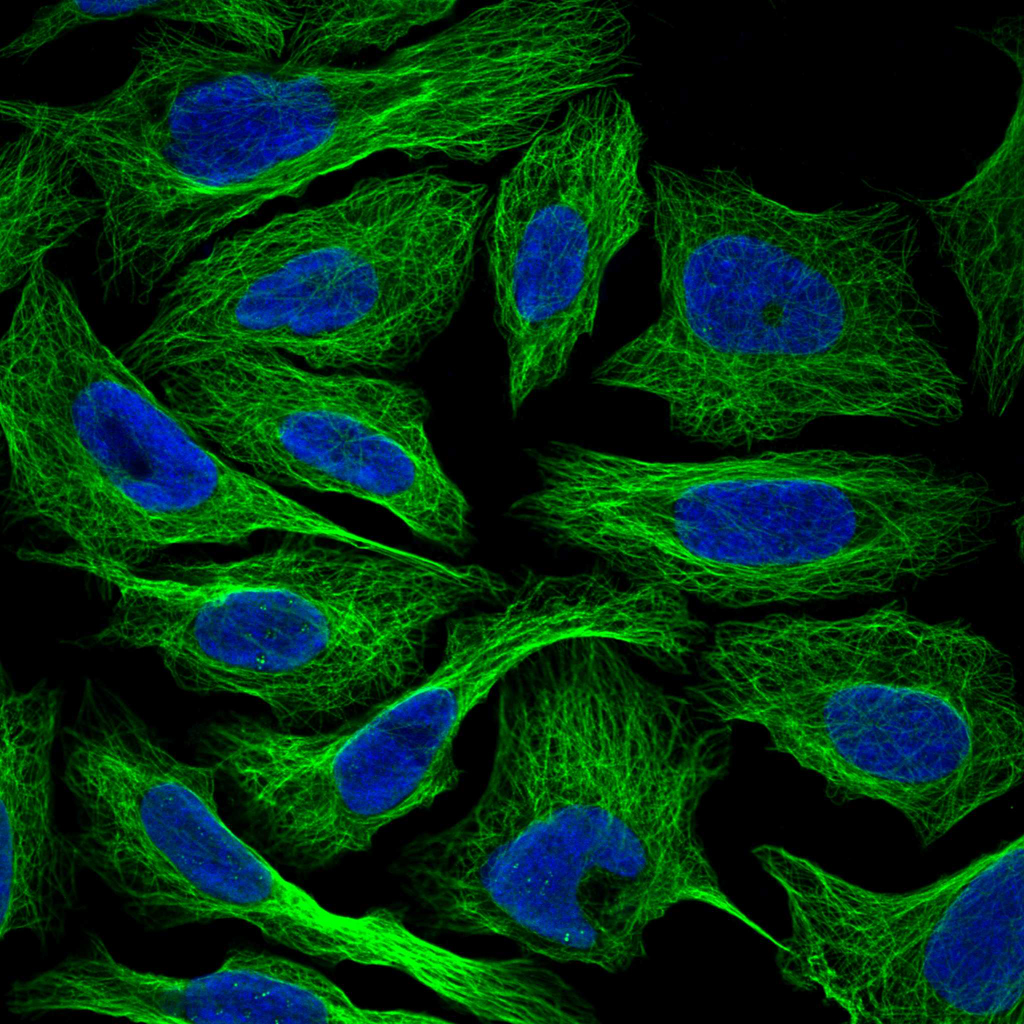

In [2]:
img = Image.open('Cell_Fluorescent.jpg')
img

**Helper Functions**

**1. Function: Image Data Extraction**
- matrix: RGB tuples according to the coordinates
- integrated density: sum of green channel values
- points: list of green channel values

In [3]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    points = []
    integrated_density = 0

    for i in range(x):
        matrix.append([])
        for j in range(y):
            matrix[i].append(image.getpixel((j,i)))
            integrated_density += image.getpixel((i,j))[1]
            points.append(image.getpixel((i,j))[1])
    return matrix, integrated_density, points

**2. Function: Histogram**

In [4]:
def creatHistogram(points_list):
    max_value = max(points_list)
    histo = [0] * (max_value + 1)
    for point in points_list:
        histo[point] +=1        
    return histo

**Execution**

**Analysing Images**

In [5]:
matrix, integrated_density, points= extractData(img)

**Histogram Ploting**

In [6]:
def histoPlot(points):
    h = creatHistogram(points)
    plt.bar(range(len(h)), h, color = 'green')

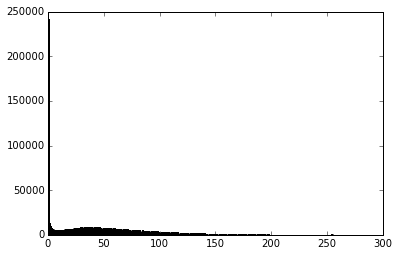

In [7]:
histoPlot(points)

In [8]:
def distinguish(matrix):    
    matrix_distinguished = matrix[:]
    for i in range(1024):
        for j in range(1024):
            dark_index = 0
            if matrix[i][j][1]<16:
                if i>3 and i<1024-3 and j>3 and j<1024-3:
                    around = [matrix[x][y] for x in range(i-3, i+4) for y in range(j-3, j+4)]
                    around.remove(matrix[i][j])
                    for a in around:
                        if a[1]<9:
                            dark_index +=1
                    if dark_index >8:
                        matrix_distinguished[i][j] = (255,0,0)
                else:
                    matrix_distinguished[i][j] = (255,0,0)
    return matrix_distinguished

In [9]:
matrix_d = distinguish(matrix)

In [10]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

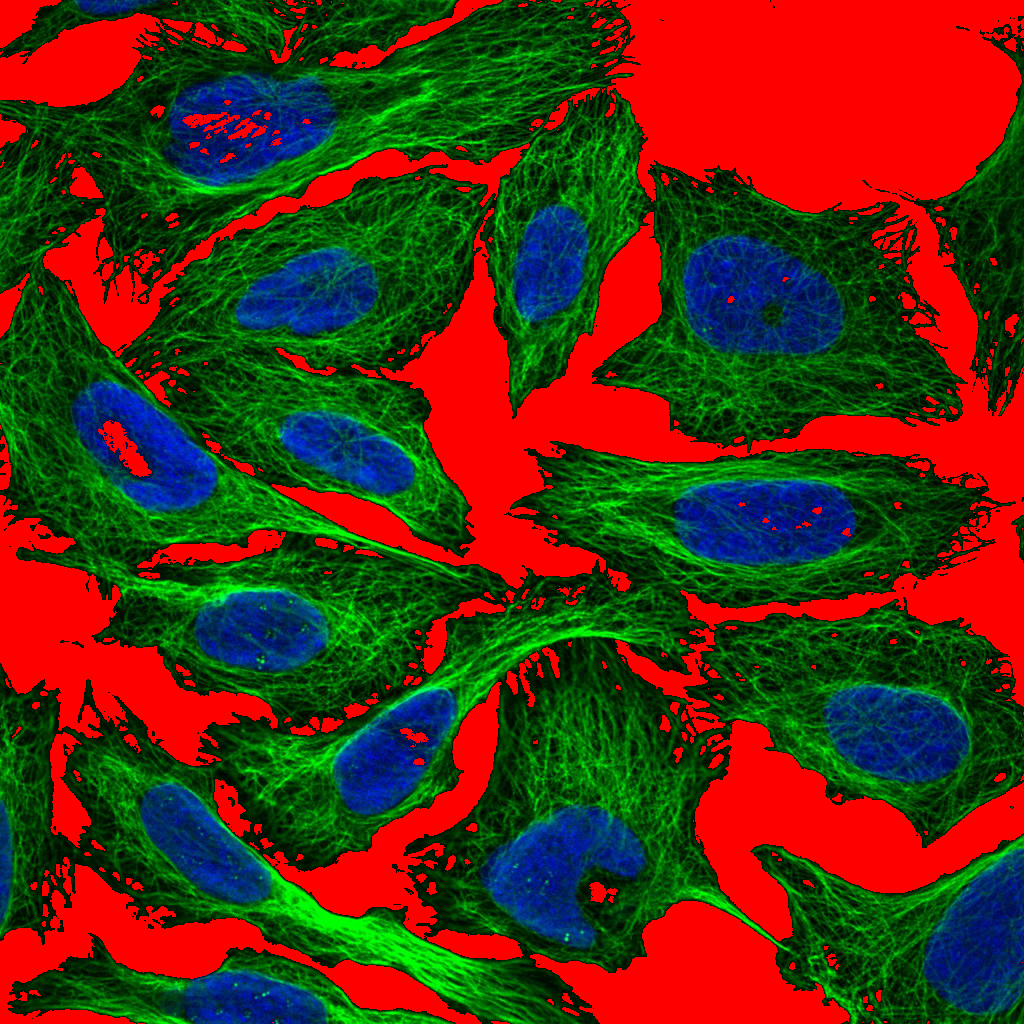

In [11]:
img = imageReconstruct(matrix_d)
img

In [12]:
def calculateDensity(matrix, matrix_d):
    interested_integrated_density = 0
    background_integrated_density = 0
    interested_area = 0
    background_area = 0
    for i in range(1024):
        for j in range(1024):
            if matrix_d[i][j][0] != 255:
                interested_integrated_density += matrix[i][j][1]
                interested_area += 1
            else:
                background_integrated_density += matrix[i][j][1]
                background_area +=1
    interested_mean = interested_integrated_density / interested_area
    background_mean = background_integrated_density / background_area
    return interested_mean - background_mean

In [13]:
density = calculateDensity(matrix, matrix_d)
density

69.88114374611594